In [2]:
library(data.table)
library(fpp2)
library(lubridate)

In [3]:
data=fread("bulk_imbalance.csv")

In [15]:
data[, sys_numeric:=ifelse(system_direction=="Negative", -1, ifelse(system_direction=="Neutral", 0, 1))]

In [16]:
data

date,hour,net,upRegulationZeroCoded,upRegulationOneCoded,upRegulationTwoCoded,downRegulationZeroCoded,downRegulationOneCoded,downRegulationTwoCoded,upRegulationDelivered,downRegulationDelivered,system_direction,sys_numeric
2019-01-01,0,-1934.795,0.000,0,0,2288.567,0,0,0.000,-1934.795,Negative,-1
2019-01-01,1,-750.866,0.000,0,0,808.083,0,0,0.000,-750.866,Negative,-1
2019-01-01,2,-982.767,0.000,0,0,1060.750,0,0,0.000,-982.767,Negative,-1
2019-01-01,3,-764.620,0.000,0,0,1120.483,0,0,0.000,-764.620,Negative,-1
2019-01-01,4,-1233.289,0.000,0,0,1874.633,56,0,0.000,-1233.289,Negative,-1
2019-01-01,5,-1469.061,0.000,0,0,2125.000,56,0,0.000,-1469.061,Negative,-1
2019-01-01,6,-1444.749,0.000,0,0,2086.000,0,0,0.000,-1444.749,Negative,-1
2019-01-01,7,-1339.938,0.000,0,0,1963.000,0,0,0.000,-1339.938,Negative,-1
2019-01-01,8,-1884.543,0.000,0,0,2509.767,0,0,0.000,-1884.543,Negative,-1
2019-01-01,9,-2178.792,0.000,0,0,2614.716,0,0,0.000,-2178.792,Negative,-1


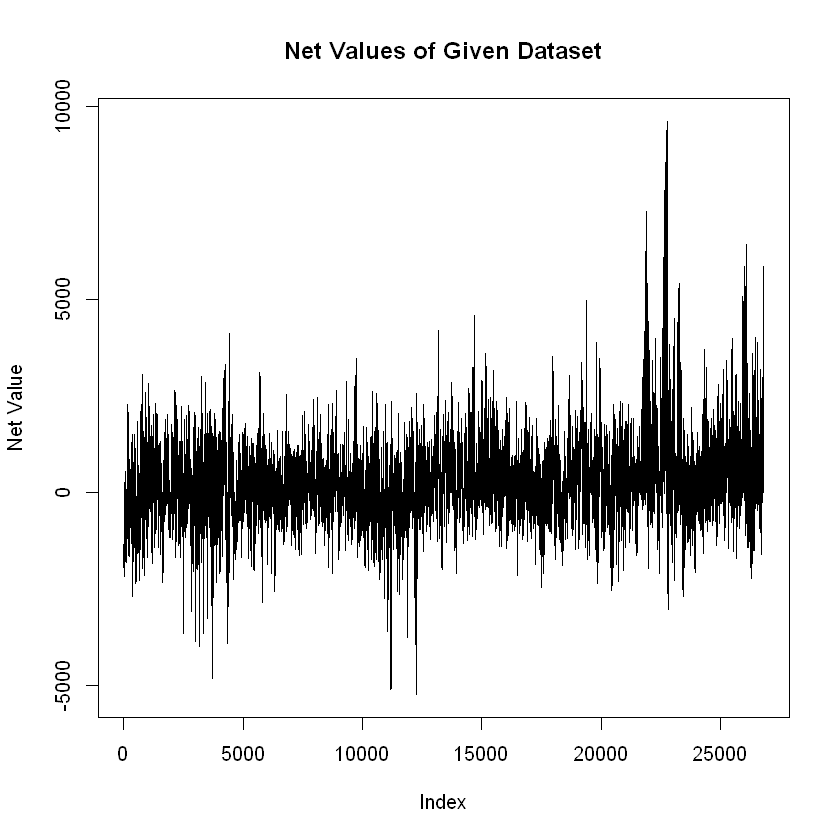

In [3]:
plot(data$net,type="l", ylab="Net Value", main="Net Values of Given Dataset")

# Autocorrelation Fuction

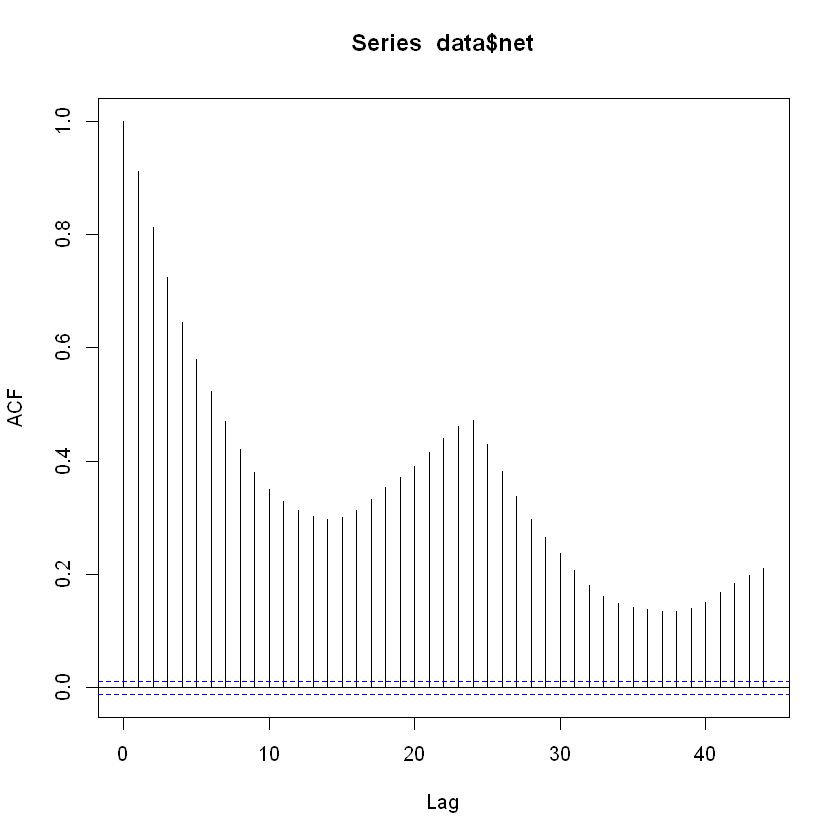

In [4]:
acf(data$net)

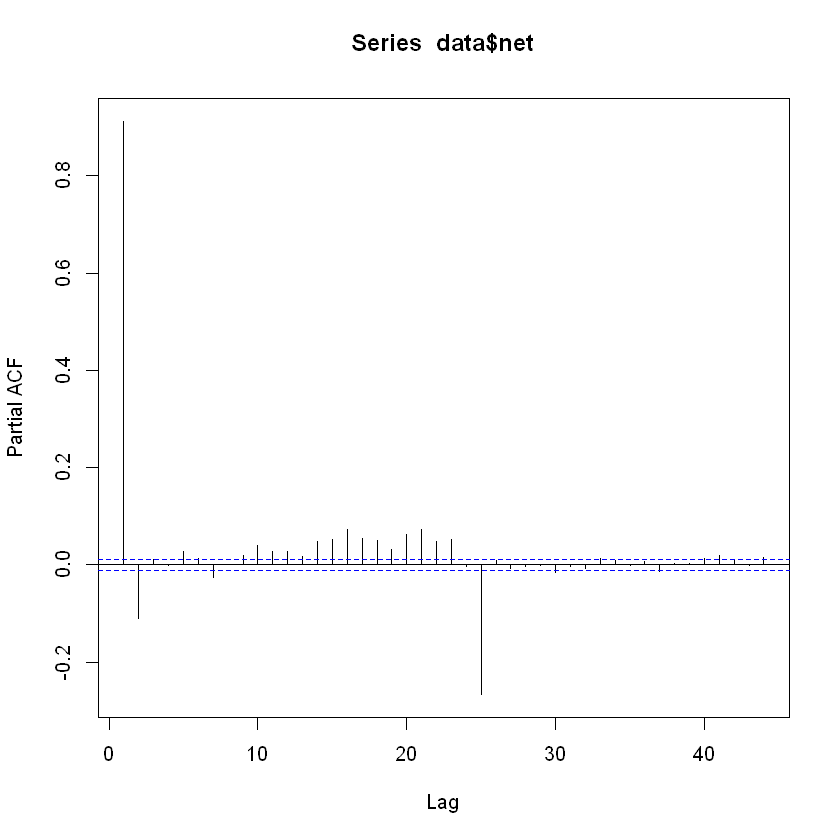

In [5]:
pacf(data$net)

## Decompose

In [6]:
library("stats")
library("tsoutliers")

Warning message:
"package 'tsoutliers' was built under R version 3.6.3"

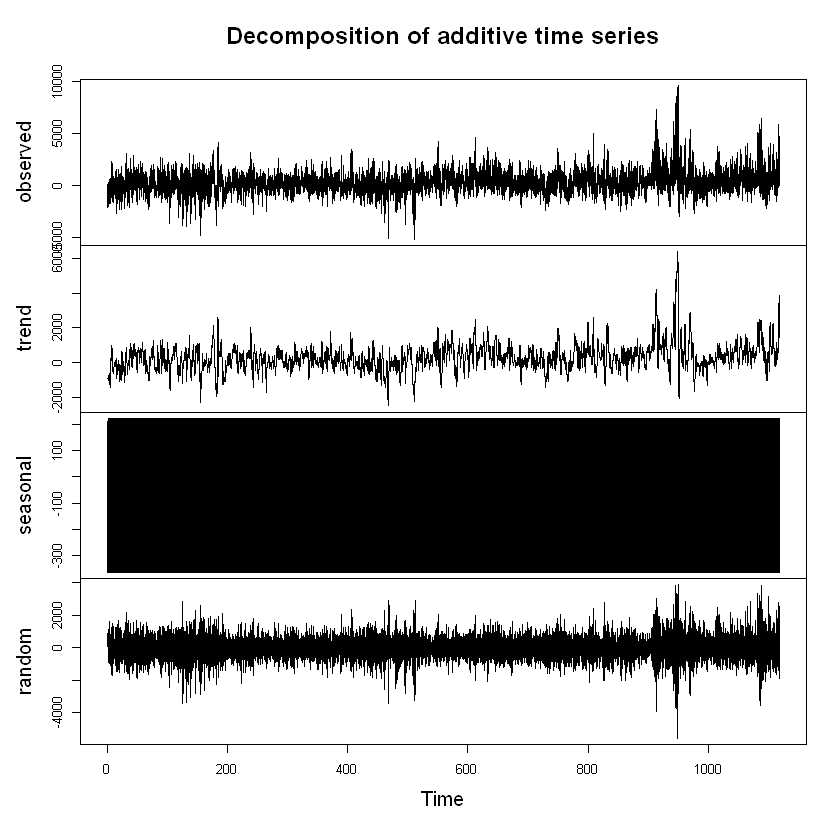

In [7]:
decomp=decompose(ts(data$net,freq=24),type='add')
plot(decomp)

In [8]:
outliers_decompose=tsoutliers(decomp$random)
outliers_data=tsoutliers(data$net)

In [9]:
outliers_decompose

$index
  [1]  2997  2998  3007  3154  3320  3322  3490  3698  3710  3711  3712  3713
 [13]  3860 11050 11194 11195 11218 11219 11220 11229 11230 11231 11890 11891
 [25] 12232 12250 12274 12284 19816 21891 21892 21893 21894 21895 21896 21899
 [37] 21900 21903 21905 21914 21915 21916 21917 21918 22591 22600 22666 22667
 [49] 22671 22672 22673 22674 22675 22676 22677 22683 22684 22685 22686 22687
 [61] 22688 22694 22695 22696 22697 22707 22708 22709 22710 22711 22712 22716
 [73] 22719 22720 22721 22722 22731 22732 22733 22734 22735 22736 22742 22743
 [85] 22744 22745 22746 22756 22757 22758 22759 22760 22766 22767 22768 22769
 [97] 22770 22781 22782 22783 23061 23238 23239 23261 23262 23263 23264 23272
[109] 25522 25675 25938 26027 26028 26031 26032 26033 26034 26039 26040 26041
[121] 26074 26081 26082 26083 26361 26794 26817

$replacements
  [1]  2199.75687  2346.98538 -2773.81359 -2483.76420 -2718.47873 -1898.73201
  [7] -1693.14771  2023.59643 -2202.17822 -2124.90713 -2027.43443 -2220.78216
 [13] -1327.41904 -1600.77664 -1867.59311 -2196.90770 -2466.12643 -2452.17722
 [19] -2239.72111  2791.22601  2483.73340  2330.13136 -1826.26116 -2272.12369
 [25] -1850.62045 -2528.36990 -1711.82949  1911.39889  2627.10651 -2153.04762
 [31] -1937.44878 -1808.95309 -1841.96099 -2062.56278 -1502.87550  2388.00806
 [37]  2114.06169  2442.32203  2246.08358 -1961.94629 -2003.72489 -1857.01355
 [43] -1800.26098 -1850.17686 -2272.99852  2172.67929 -1173.58187 -1326.80139
 [49]  1613.53518  1539.66646  1454.98465  1365.52034  2162.66229  1761.10258
 [55]  2670.96433  -649.47264  -739.51566  -886.25780  -562.57329  -558.70334
 [61]  -719.03970  1225.52154  1538.79171  1872.03892  2184.55832  -733.44821
 [67]  -735.88055  -711.97916  -378.23871  -300.06315  -316.59377  2387.57138
 [73]  1966.77367  1582.40191  1167.54661   781.41975  -322.26651  -519.73808
 [79]  -678.42449  -620.25006  -798.15345  -995.12794   391.74636   422.59689
 [85]   398.57013   364.96114   356.90528 -2110.41624 -1901.14665 -1567.99446
 [91] -1451.43302 -1278.27876  1221.50407  1128.52923   994.41893   871.73041
 [97]   771.41968 -2047.03848 -1873.25697 -1979.41263  1728.54125 -2269.27876
[103] -2483.79563 -1486.01449 -1285.96790 -1218.93425  -820.77485  1666.76350
[109]   798.77060  1170.87024  2388.53384  1688.07117  1648.64111  2459.15253
[115]  2005.93760  1882.14629  1630.67475 -1610.23609 -2206.36149 -2215.54588
[121]  1393.99854  1614.87788  2079.45074  2381.37132  2389.50726  1695.57352
[127]    44.08527

In [10]:
outliers_data

$index
  [1]  3007  3154  3708  3709  3710  3711  3712  3713  4359  4360  4407  4408
 [13]  4409  4410 11194 11195 11196 11198 11199 11218 11219 11220 12202 12232
 [25] 12249 12250 12251 12252 13192 14680 14681 19380 19381 19382 19383 21875
 [37] 21876 21879 21880 21881 21882 21883 21884 21885 21886 21887 21898 21899
 [49] 21900 21901 21902 21903 21904 21905 21906 21907 21908 21909 21910 21922
 [61] 21923 21924 21927 21928 21929 21930 22599 22600 22601 22602 22603 22605
 [73] 22606 22629 22670 22671 22672 22673 22674 22675 22676 22677 22678 22679
 [85] 22690 22691 22692 22693 22694 22695 22696 22697 22698 22699 22701 22714
 [97] 22715 22716 22717 22718 22719 22720 22721 22722 22723 22724 22725 22726
[109] 22727 22728 22738 22739 22740 22741 22742 22743 22744 22745 22746 22747
[121] 22748 22749 22750 22751 22752 22753 22754 22762 22763 22764 22765 22766
[133] 22767 22768 22769 22770 22771 22772 22773 22774 22775 22810 22812 23061
[145] 23225 23247 23248 23249 23250 23251 23252 23253 23254 23271 23272 23273
[157] 23274 23275 23277 25938 25961 25962 26027 26028 26030 26031 26032 26033
[169] 26034 26074 26081 26082 26083 26084 26794 26795 26808 26810

$replacements
  [1] -2661.681 -3147.402 -3624.657 -3632.336 -3640.015 -3647.694 -3655.373
  [8] -3663.052 -3502.829 -3341.630  3582.836  3516.485  3450.133  3383.782
 [15] -3661.430 -3754.002 -3846.573 -3870.923 -3802.702 -3867.347 -3837.034
 [22] -3806.721 -2651.119 -3323.521 -3496.881 -3355.014 -3213.146 -3071.279
 [29]  3467.525  4085.269  4098.183  4001.434  4028.587  4055.741  4082.894
 [36]  4023.416  4129.128  4512.819  4518.865  4524.912  4530.959  4537.005
 [43]  4543.052  4549.099  4555.146  4561.192  3417.668  3477.884  3538.101
 [50]  3598.317  3658.534  3718.750  3778.966  3839.183  3899.399  3959.616
 [57]  4019.832  4080.049  4140.265  2418.936  2858.129  3297.322  3435.813
 [64]  3542.091  3648.368  3754.646  3684.306  3872.877  4061.449  4250.020
 [71]  4438.591  4551.225  4475.287  4044.376  4174.414  4203.679  4232.944
 [78]  4262.209  4291.474  4320.738  4350.003  4379.268  4408.533  4437.798
 [85]  3019.054  3146.862  3274.670  3402.478  3530.286  3658.095  3785.903
 [92]  3913.711  4041.519  4169.327  4479.015  3483.085  3559.758  3636.431
 [99]  3713.103  3789.776  3866.449  3943.122  4019.795  4096.468  4173.141
[106]  4249.814  4326.486  4403.159  4479.832  4556.505  3415.173  3446.958
[113]  3478.744  3510.529  3542.315  3574.100  3605.886  3637.671  3669.457
[120]  3701.243  3733.028  3764.814  3796.599  3828.385  3860.170  3891.956
[127]  3923.741  4180.979  4135.675  4090.371  4045.067  3999.763  3954.459
[134]  3909.155  3863.850  3818.546  3773.242  3727.938  3682.634  3637.330
[141]  3592.026 -2500.810 -2619.632  3207.067  4060.569  3701.034  3681.750
[148]  3662.467  3643.184  3623.900  3604.617  3585.334  3566.050  2829.669
[155]  3110.055  3390.441  3670.828  3951.214  4161.096  3965.674  3962.726
[162]  3826.378  4218.652  4228.148  4227.847  4218.051  4208.256  4198.460
[169]  4188.664  3866.020  3867.055  3841.032  3815.008  3788.985  4323.620
[176]  4182.843  4204.058  4159.786

# Visual Control

In [11]:
net_val=data$net

In [12]:
str(net_val)

 num [1:26832] -1935 -751 -983 -765 -1233 ...


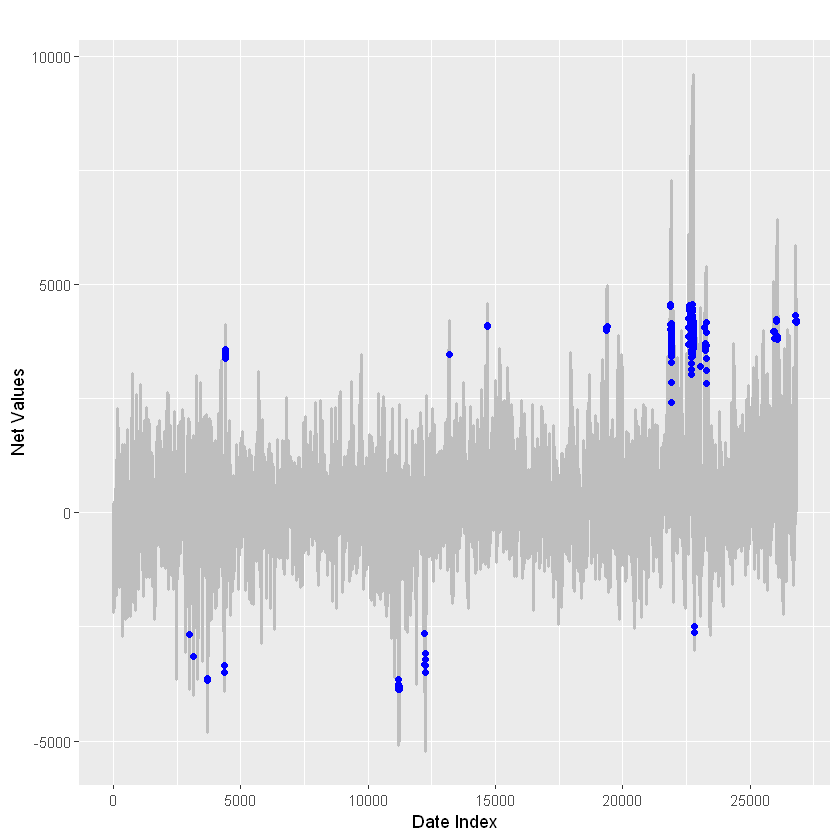

In [13]:
autoplot(ts(tsclean(net_val)), series="clean", color='red', lwd=0.7) +
  autolayer(ts(net_val), series="original", color='gray', lwd=1) +
  geom_point(data = tsoutliers(net_val) %>% as.data.frame(), 
             aes(x=index, y=replacements), col='blue') +
  labs(x = "Date Index", y = "Net Values")

# Date and Values 

In [14]:
data[outliers_data$index]

date,hour,net,upRegulationZeroCoded,upRegulationOneCoded,upRegulationTwoCoded,downRegulationZeroCoded,downRegulationOneCoded,downRegulationTwoCoded,upRegulationDelivered,downRegulationDelivered,system_direction
2019-05-06,6,-3860.885,0.000,0.000,0,2987.250,1518.000,0,0.000,-3860.885,Negative
2019-05-12,9,-3992.865,0.000,0.000,0,4275.932,230.667,0,0.000,-3992.865,Negative
2019-06-04,11,-4164.322,0.000,0.000,0,2748.000,1505.283,0,0.000,-4164.322,Negative
2019-06-04,12,-4402.134,0.000,0.000,0,2801.000,1668.000,0,0.000,-4402.134,Negative
2019-06-04,13,-4634.576,0.000,0.000,0,2676.000,2007.000,0,0.000,-4634.576,Negative
2019-06-04,14,-4761.770,0.000,0.000,0,2706.000,2170.000,0,0.000,-4761.770,Negative
2019-06-04,15,-4806.000,0.000,0.000,0,2706.000,2191.000,0,0.000,-4806.000,Negative
2019-06-04,16,-4591.091,0.000,0.000,0,2749.000,1942.500,0,0.000,-4591.091,Negative
2019-07-01,14,-3917.745,0.000,986.000,0,5669.283,0.000,0,978.150,-4895.895,Negative
2019-07-01,15,-3847.665,0.000,986.000,0,5609.133,0.000,0,978.260,-4825.925,Negative
